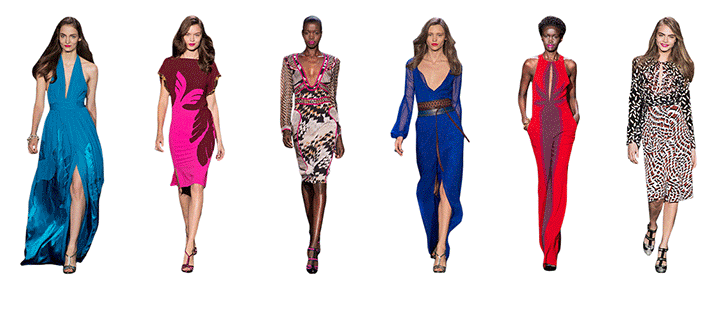
## Fashion Class Classification - Using CNN(Convolutional Neural Network)

### ==> Means to NN after Converting features(image pixels) to desired form

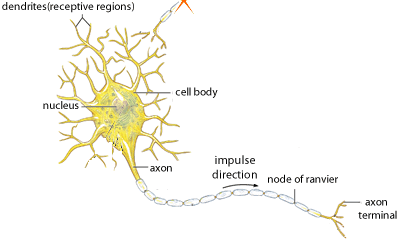
The Global fashion industry is valued at 3 Trillion Dollar & Accounts for 2% of World's GDP. Here we are going to use ML technique to classify the Fashion Class to build a virtual stylish assistant that looks at customer's social media images & classify what styles the customers are wearing, The virtual assistant can help retailer to find fashion trends & launch targeted fashion campaigns. Here we are going to use **fashion MNIST data** which contains images of bags, shoes, dresses, etc. & we are asking the deep network to classify the images into 10 classes.Here We want to build say app or model which can learn & say what kind of class this image belongs to whether it is bag, shorts, dress, hat. That is we want to build a deep learning model that can classify the images into different categories.Here we have gray-scale images & have to classify these gray-scale images into 10 class or 10 cathegories. The Prime example that we are going to build can be Amazon's Echo look style Assistant.
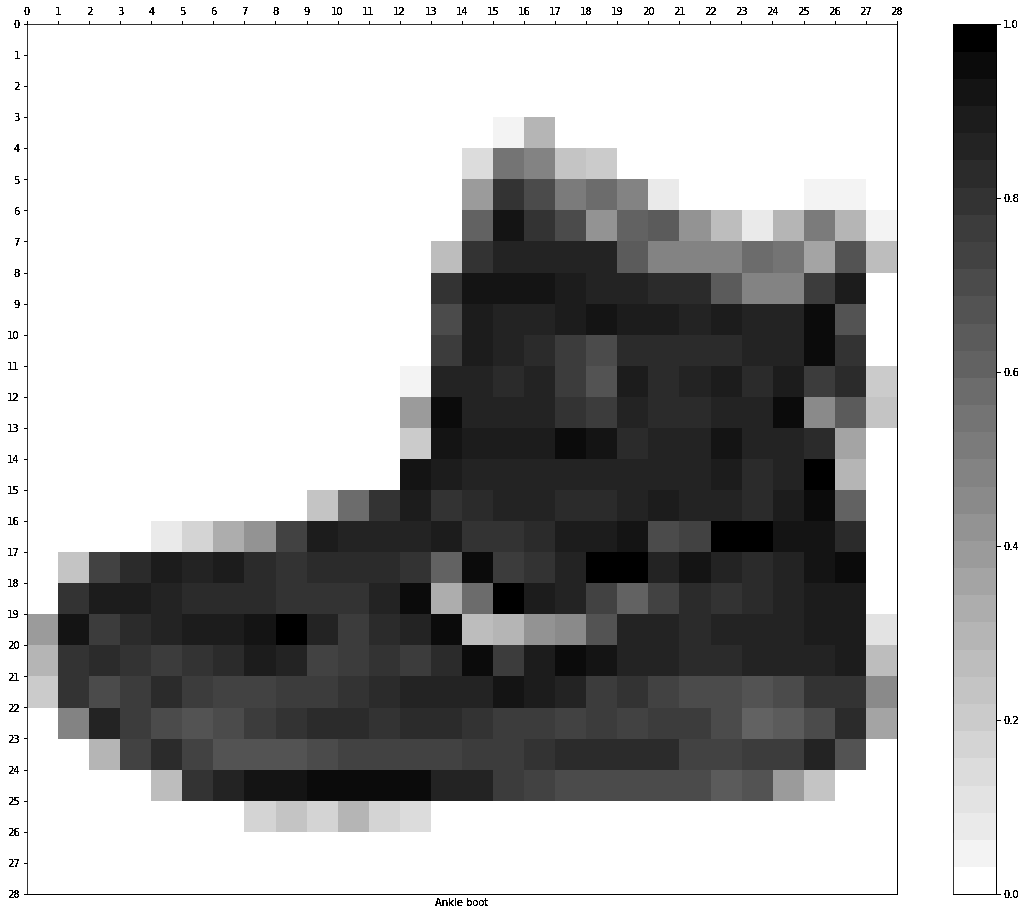

The fashion MNIST data-set contains 70k images,they are divided into 60k training set & 10k test set. All these 70k images are gray-scaled 28x28 images. For example consider following images of 28x28.

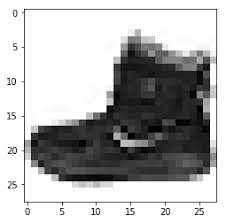  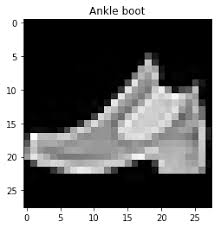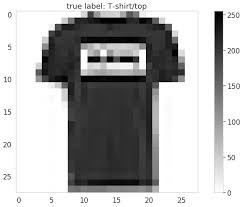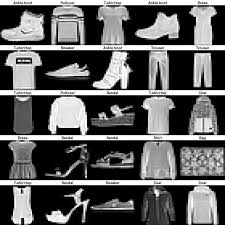

Like the above image of sneakers we have 70k gray-scaled images, We will use binary numbers to show image pixels, for that we consider 0 to 255 numners to show it. For example binary numbers '00000000' represented by 0(white color) & '11111111' represented by 255(most dark color i.e. black) & other numbers shoes the in-between gray-scaled(shades) colours. These images are bunch of pixels. This is how we come to conversion from binary to 256 numbers. The data set rows represents the images & columns represents the pixels, Here we have 28x28 pixels this is way we have 28x28 = 784 independent pixel columns & 1 label column of 10 categories labeled as from '0 to 9'                                                                           
**`Label values ==> 0: T-shirt/Top, 1: Trouser, 2: Pullover, 3: Dress, 4: Coat, 5: Sandal, 6: Shirt, 7: Sneaker, 8: Bag, 9: Ankle Boot`**

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import random

from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential #we use sequetail model to follow some sequence in modelling like we are gona build in order
# of Convolutional layer, MaxPooling, Dropout, Flattening, Dense. This form the fully connected network.
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from sklearn.metrics import confusion_matrix,classification_report

Using TensorFlow backend.


### Data-sets

In [2]:
df_train = pd.read_csv('fashion-mnist_train.csv')
df_test = pd.read_csv('fashion-mnist_test.csv')

In [3]:
df_train.head(2)

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  

[2 rows x 785 columns]

In [5]:
df_test.head(2)

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      0       0       0       0       0       0       0       0       9   
1      1       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       8  ...       103        87        56         0         0         0   
1       0  ...        34         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  

[2 rows x 785 columns]

In [6]:
df_train.shape, df_test.shape

((60000, 785), (10000, 785))

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [11]:
df_train.label.unique(), df_train.pixel1.unique(), df_train.pixel2.unique(), df_train.pixel3.unique(), df_train.pixel4.unique()

(array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1], dtype=int64),
 array([ 0, 14,  7,  3, 16,  1,  4,  2], dtype=int64),
 array([ 0,  1,  3, 10,  6,  2,  7,  5, 16, 14, 13,  9, 34, 15,  4, 11, 36],
       dtype=int64),
 array([  0,   2,   1,  10,   3,   6,   4,   5,   7,  56,  34,  32,  16,
         14,  78,  25,  13,   9,   8,  52,  35,  30,  23,  54, 226,  15,
        106], dtype=int64),
 array([  0,   1,   5,   2,   3,  20,  46,  87,   4,  16,  12,   6,  64,
         36,  52,  13,   7, 164, 110,  14,  92, 106, 120, 105,  53,  70,
          9,  23,  49,  25,  26,  34, 121,  21,  17,  10,  41,  18,  28,
         80,  56, 144,  22,  54,  55,  50,  90, 150,  19, 109,  83, 132,
         48,  11,  32, 145,  39,  96,  15,  58,   8,  68,  82, 146,  86],
       dtype=int64))

In [27]:
df_train.iloc[0,:]

label       2
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
pixel29     0
           ..
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 0, Length: 785, dtype: int64

### Data Visualization

In [3]:
training = np.array(df_train)
testing = np.array(df_test)
training

array([[2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       ...,
       [8, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0]], dtype=int64)

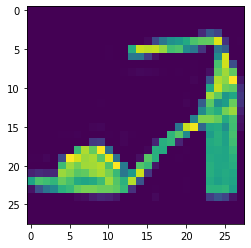

In [15]:
# in all we have 10 categories of items labeled from 0 to 9
plt.imshow(training[10050,1:].reshape(28,28))

In [51]:
training[0,1:]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,
         0,   0,   0,  62,  61,  21,  29,  23,  51, 136,  61,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  88, 201, 228, 225, 255, 115,  62, 137, 255, 235, 222,
       255, 135,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  47, 252, 234, 238, 224, 215, 215, 229, 108, 180, 207,
       214, 224, 231, 249, 254,  45,   0,   0,   0,   0,   0,   0,   0,
         0,   1,   0,   0, 214, 222, 210, 213, 224, 225, 217, 22

Here Let's create a random image generator, so that we can we images by just one click without changing anything. Also create label, so that we can understand what is the category of item out-off 10 categories from 0 to 9

(34422, 5)

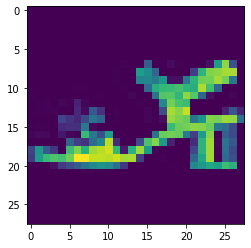

In [17]:
import random
i = random.randint(0,60000)  # i can be any random integer from 0 to 59999
plt.imshow(training[i,1:].reshape(28,28))  # here we are selecting from column 1 as column 0 is label column
label = training[i,0]   # column 0 is label column
i,label # it also shows the row, category of item from 0 to 9

**Label values ==> 0:'T-shirt/Top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle Boot'**

## CNN Description

We Will be using ***Convolutional Neural Network*** to Build the model. Neural Networks are inspired by our brain which contains billions of neurons & these neurons keep firing it means these neurons collect data or information from dendroids(tree shaped branching) process information within nucleus & generates the output or learning out of it into axon(part of neuron that sends signal to synapes), in simple form axon is output of neuron & these billions of neurons are learning with each other & learning happens by changing kind of these weights to it.

Here we are taking our human neuron & making a model out of it in an mathematical form. Our biological neuron has a nucleus to it. In mathematical form we will represent it by a summation kind of element to the model. We gona have certain bunch of inputs & weights attached to it, then we gona multiple the weights with input & take sum of it that will be nucleus & also we will add some bias to the sum so that the nucleus(learing) can be shifted aroud up & down and then we will multiply the output by the activation function(it might be let's say exponential function or sigmoid function, etc) & that output we will be connected to the another neuron & so on & so forth. These connections(neurons) can be hundreds or Thousands which forms a kind of mini-brain & we can teach that mini-Brain what-ever we want. That is how the neural network or ***Artificial Neural Network (ANN)*** look like. In Brief ***ANN or CNN*** has one input, 100 or 1000 of Hidden & one output layer to it. That is how the CNN learns specific pattern & can say what kind of image it is whether it is a bag or shirt or sneakers, etc.
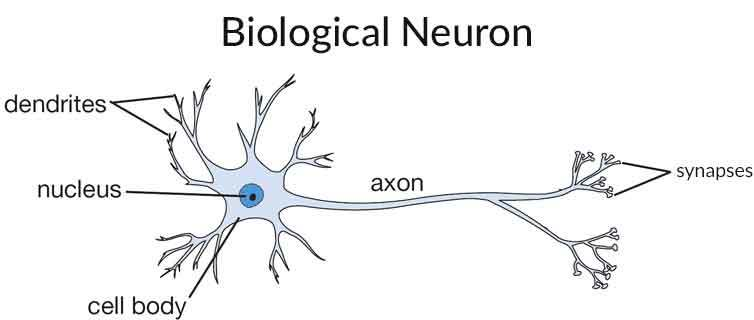

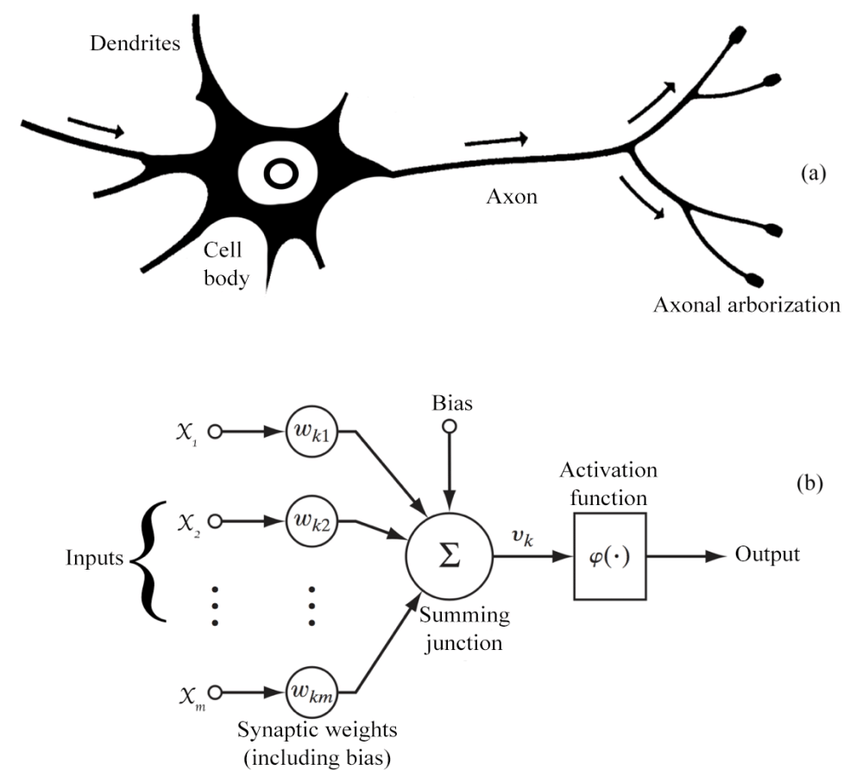

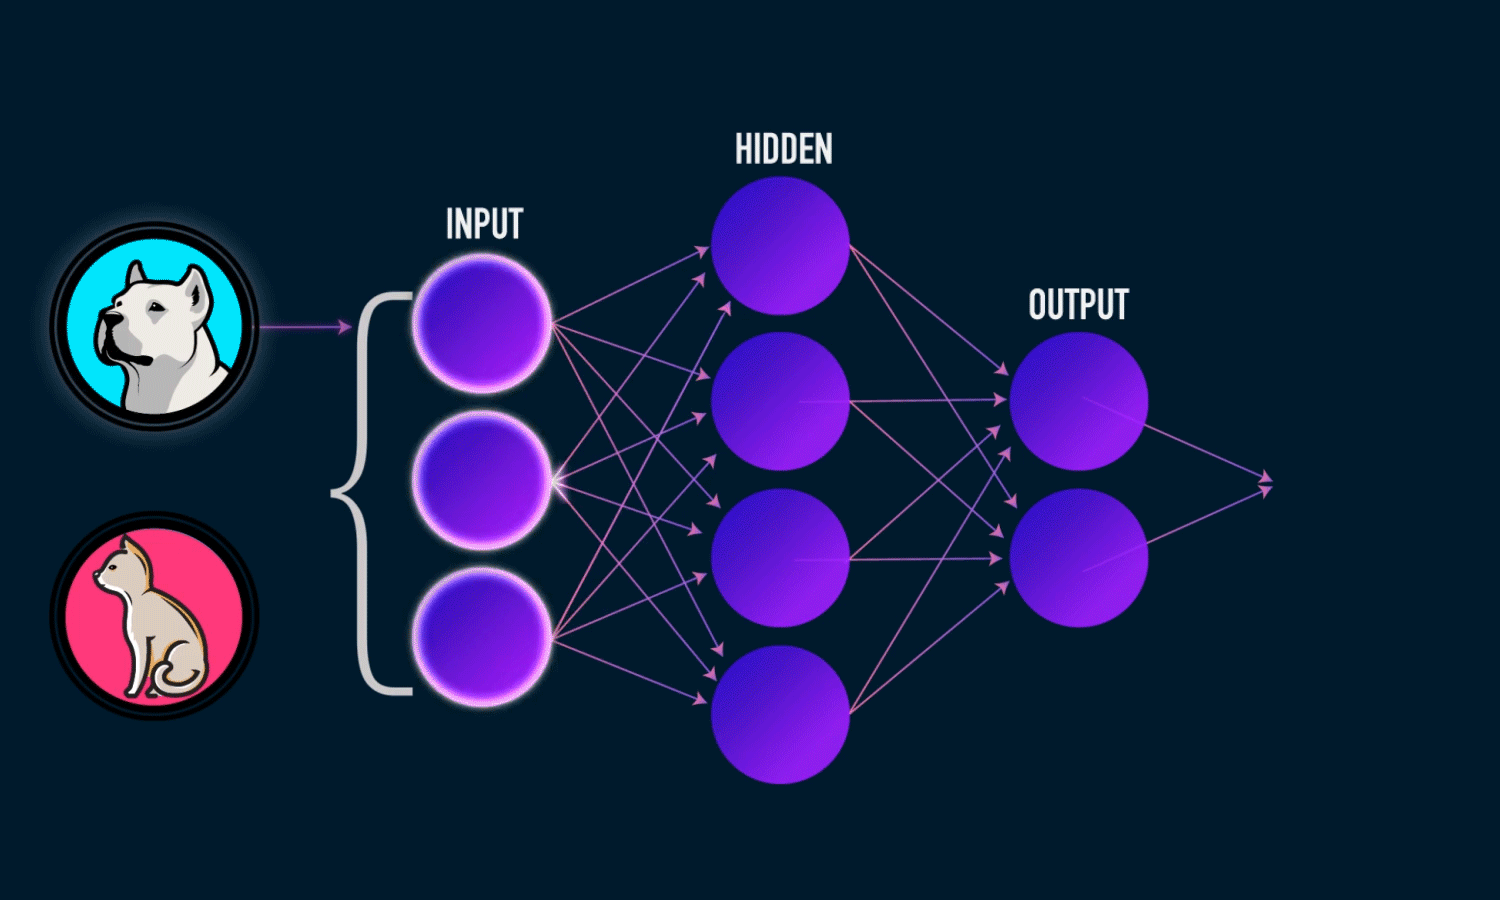



If we take 28x28 image(1 single row) & use it as input to the training network then we get terrible results. Why this? The point is we can not treat images in gereral in a same fashion as we treat features. When we deal with images, we need to preserve a special dependency between pixels, for example if we take image of Bag in here all the pixels of Bag should have dependency among themselves. That's why we need to perform the prior process called **Convolution** & here the term **CNN** came in the picture.

Here for each of the images we are going to run the convolutional layer where we gona run feature detectors & perform the process of convolution on each image then we use these feature detectors for the process of Pooling & create smaller set called pooling filters & there after we flattern them & fead them to our network, This is the kind of overview that how the CNN look like.

Lets's get understand terms involve in CNN                                                                                     
**1. Feature detection:** Here we 1st create a small feature matrix using some part of image pixel & then apply it through the whole features(pixels) of a image, in simple form we can get feature detector through the image & we create feature map which is kind of boild down features out-of this image.Let's assume we wanna do blur of image, here we get feature map as an output by scanning a whole image by feature detector & average them(for say). so, feature maps are simply the output of running the feature detector on a image. Following GIFs shows the feature mapping in action....
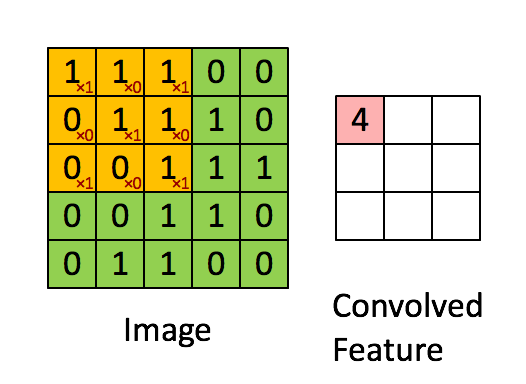
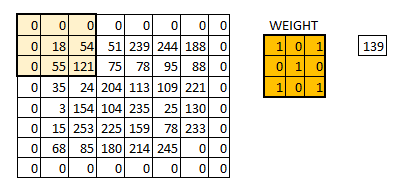
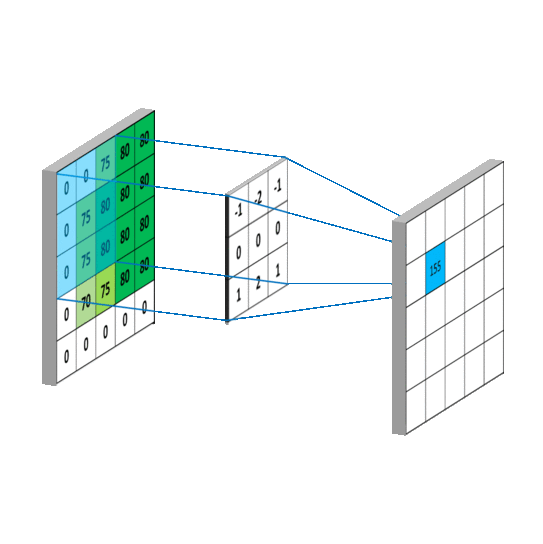
In above GIFs we are multiplying Each pixel of feature detector with each pixel of image & then sum-up that creates feature maps and the process follows for each perticular selection of image

**2. RELU activation function:** called as Rectified Linear Units are used to add non-linearity & also enhances the sparsity or scatteredness in the feature map. simply saying it kills all the negative values(pixels) in the feature map & makes it 0 to avoid oscillation in feature map their by makes the images more clear & scattered/spares. It just makes the images more clear. we can also use sigmoid activation function but for NN is not a good option as there come a saturation point in the sigmoid curve & we want to preserve our slope or gradient to moving forward.
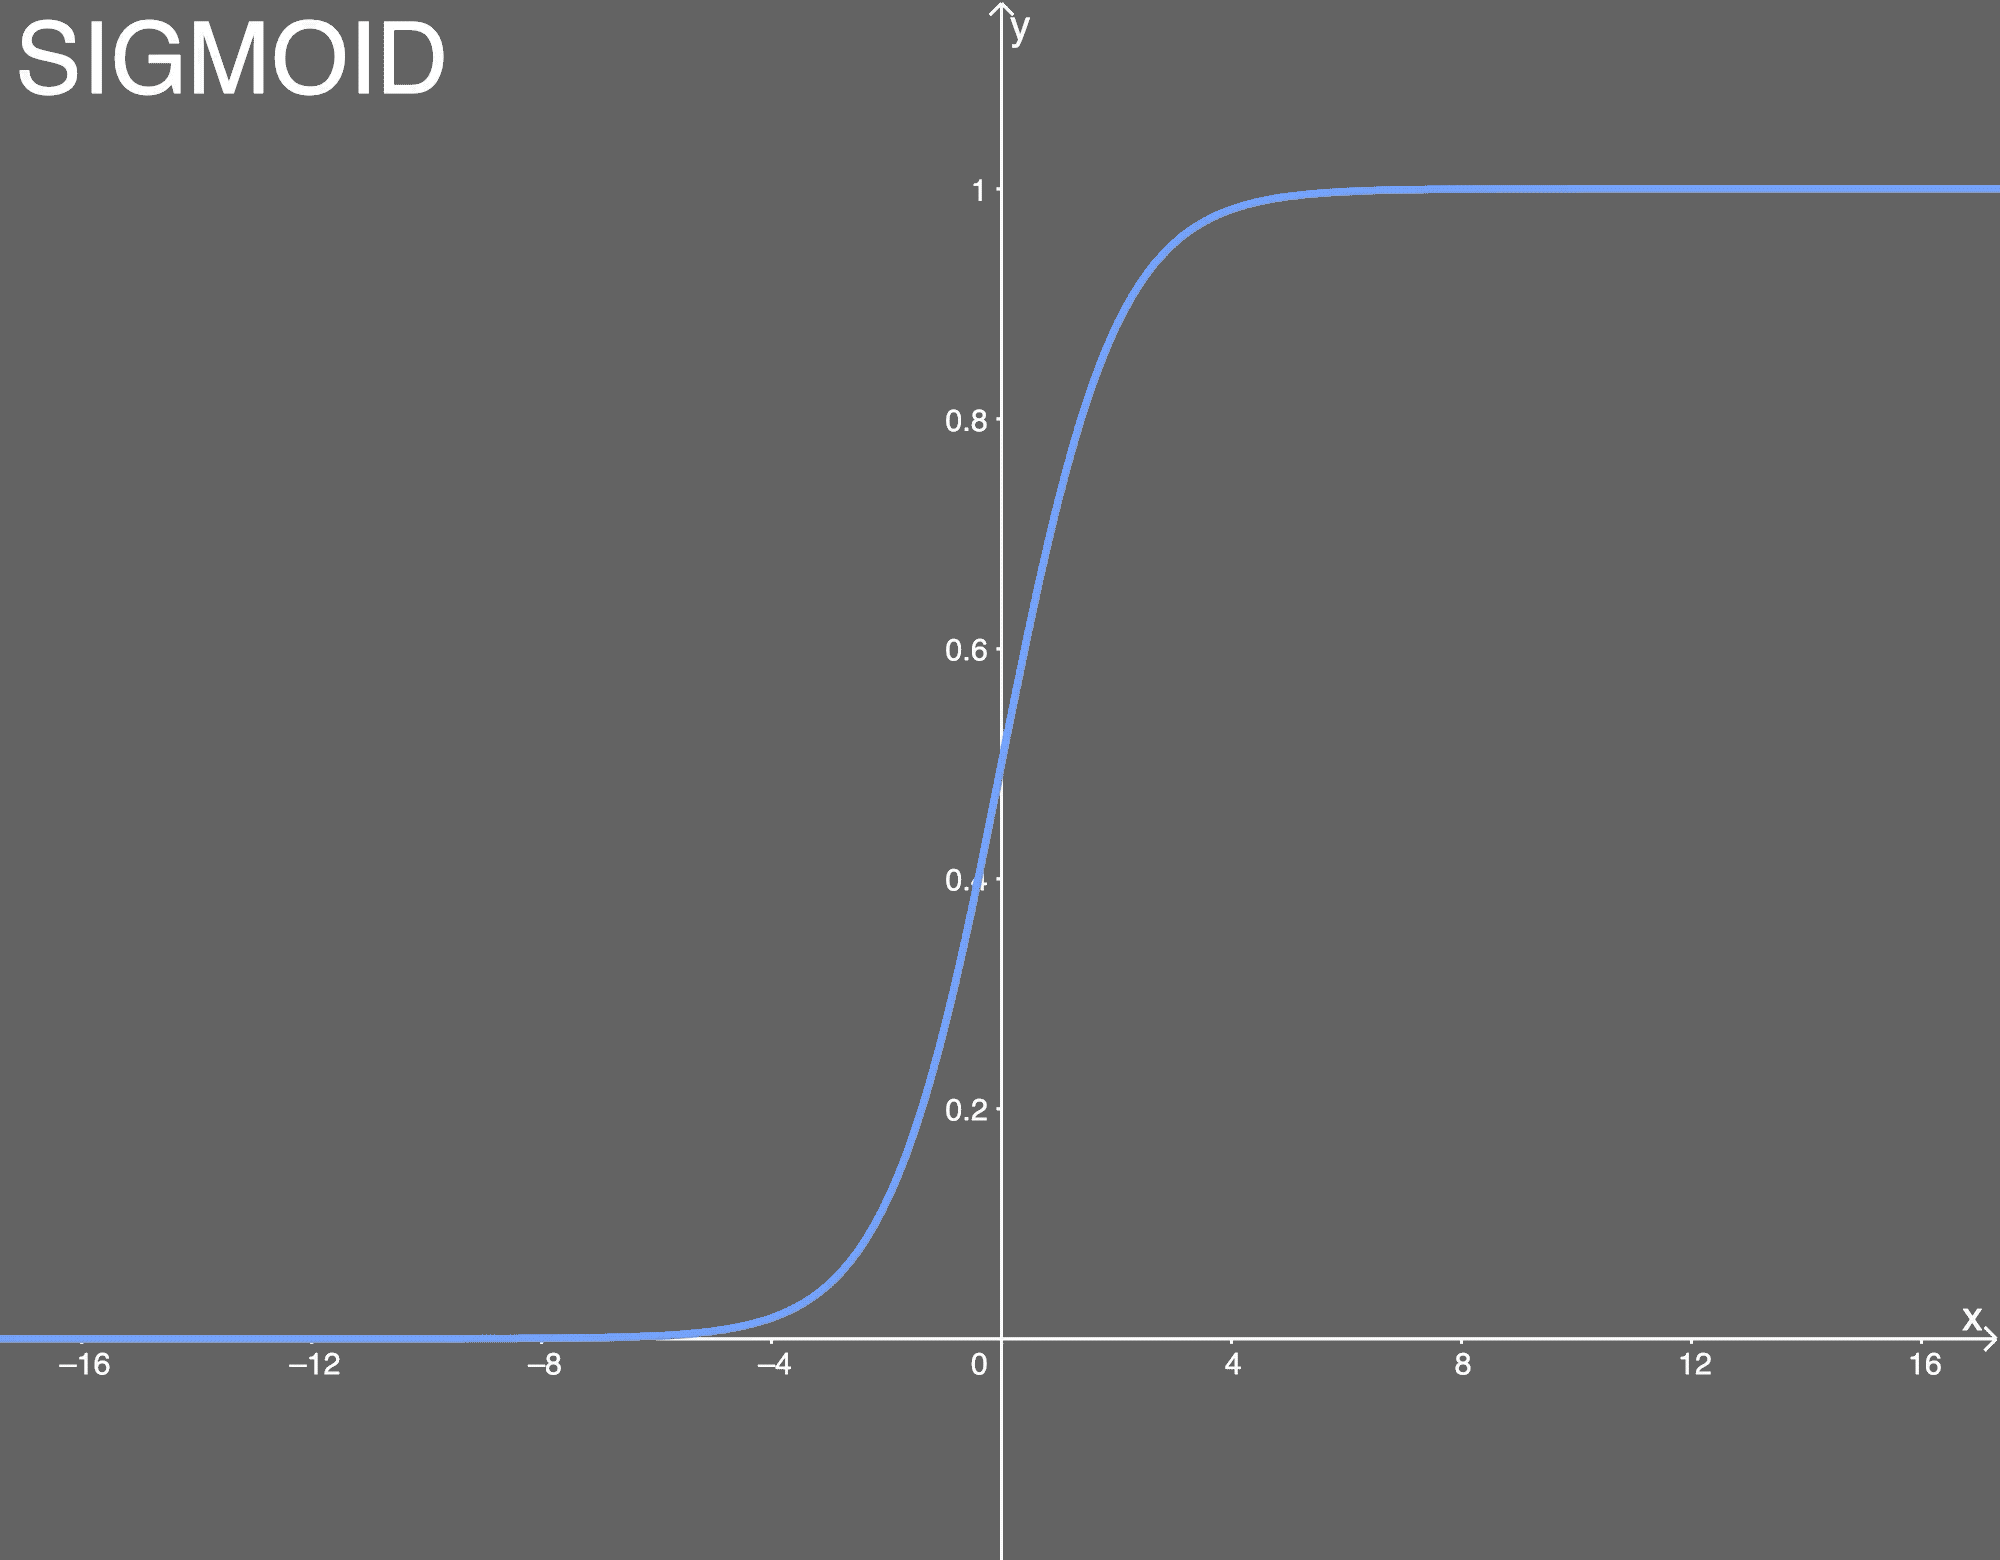
                                                                                                                               
**3. Max-Pooling/Flatting:** Pooling or **down sampling** layers is a technique of dimensionality reducion which placed after convolutional layers to reduce feature map dimensionality.This improves the computational efficiency while preserving the features. It also helps in avoiding overfitting. If one of pixel is shifted, the poolied feature map will still be the same. Max-pooling works by retaining **maximum feature response**. There are also techniques such as mean pooling, min pooling,etc.
Following is the action of max-pooling which converts 4x4 matrix into 2x2.
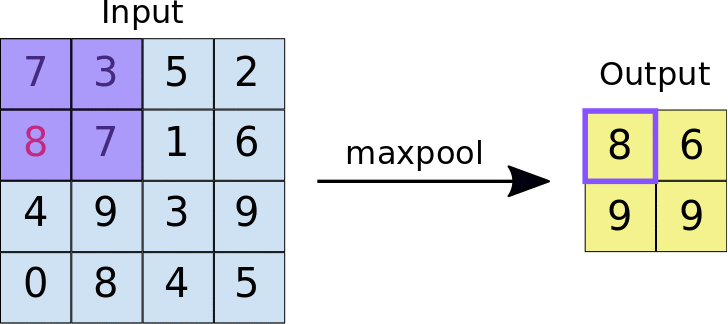

After pooling the next step is **`FLATTENING`** which takes the pooled matrix & make it as a flatted array to fead it to the network.
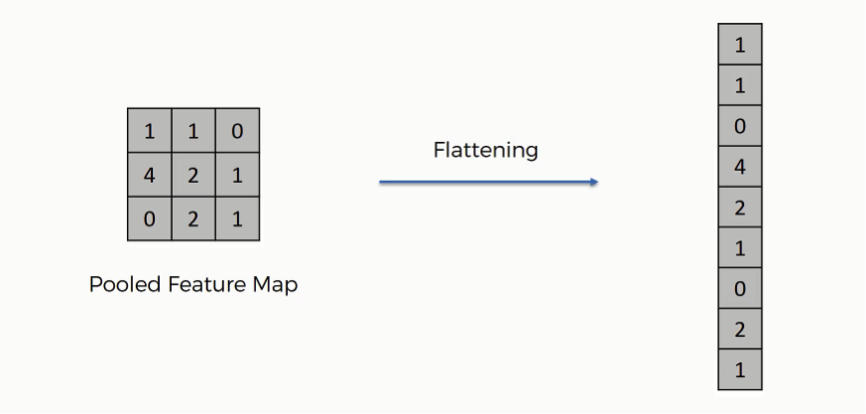

In a quick view to know the  class of image we need to pass via feature extraction, feature detection, feature map, applying RELU function, Applying pooling & Flattening & then feeding the array to the Network.
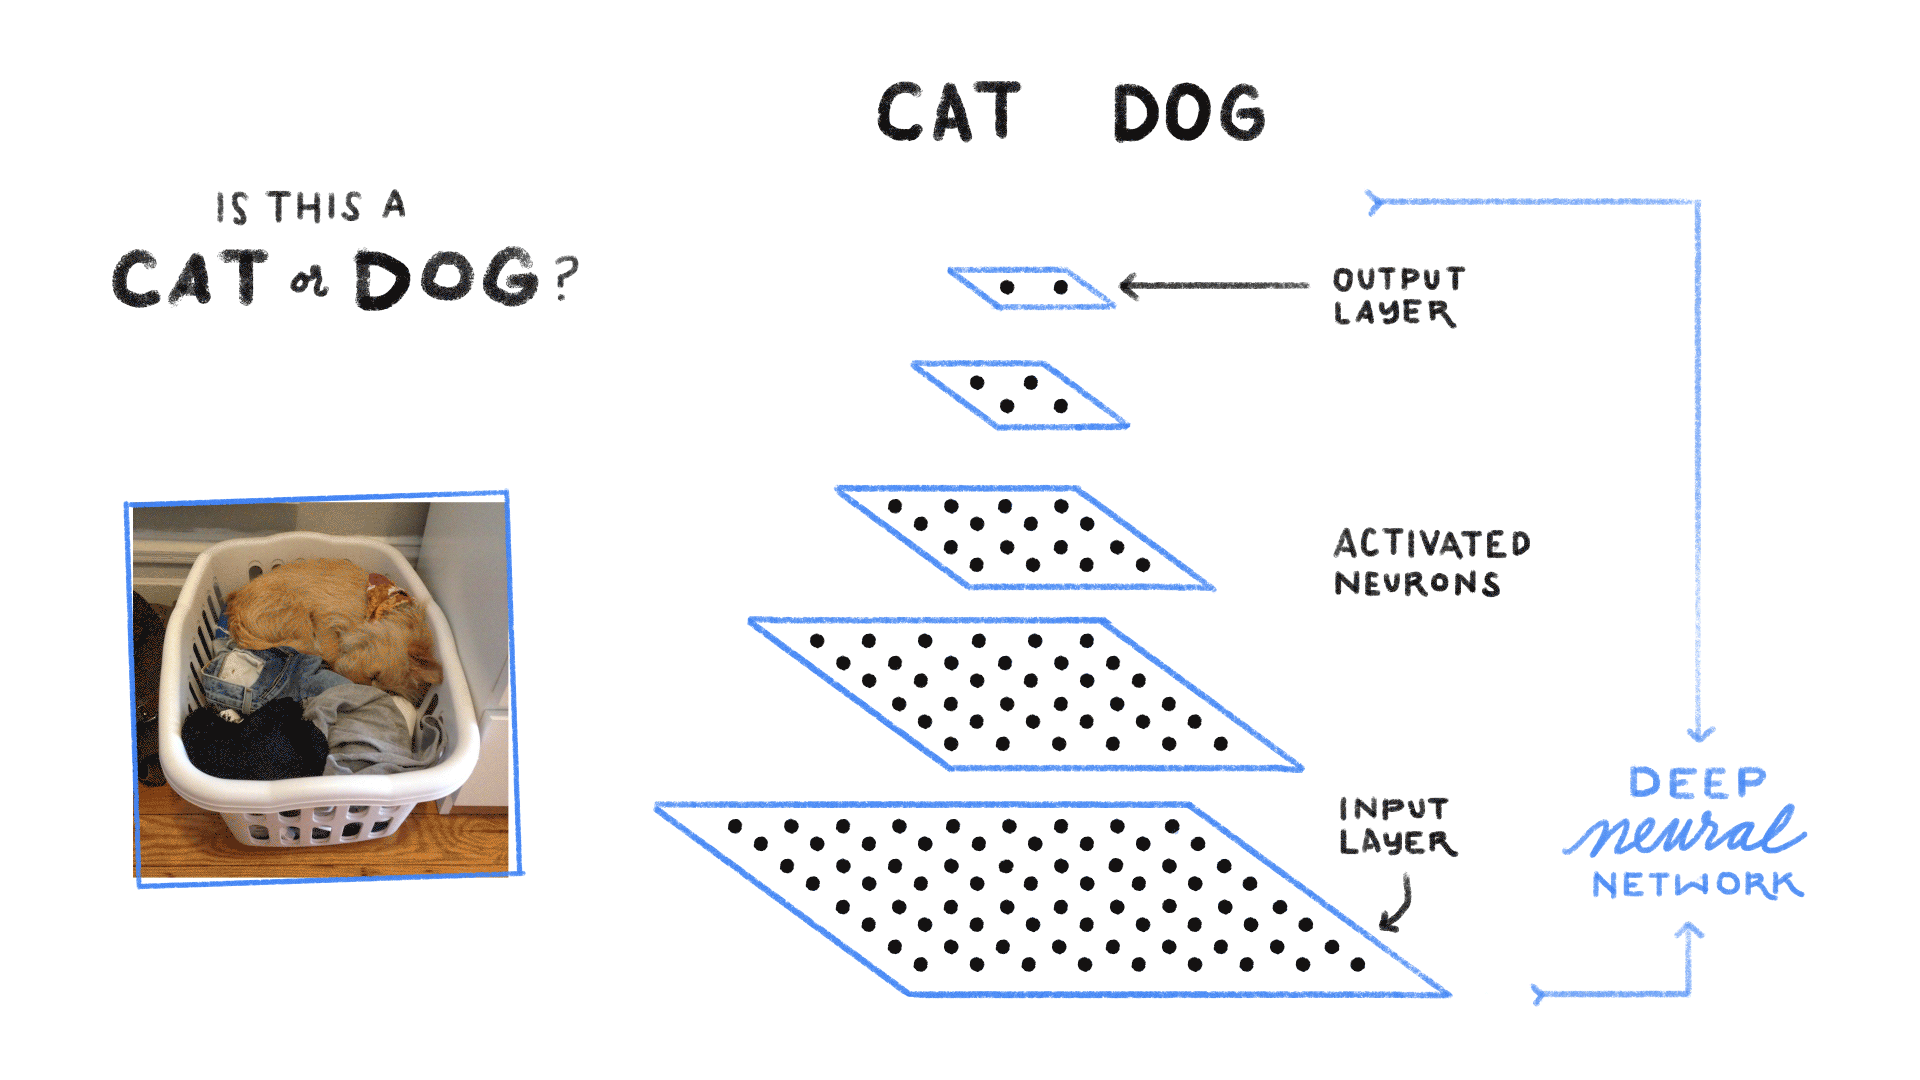

In all there are following 8 layrs:   
1. Input layer
2. Convoltional layer 1
3. Downsampling or Pooling layer 1
4. Convolutional layer 2
5. Downsampling layer 2
6. Fully-Connected layer 1
7. Fully-Connected layer 2
8. Output layer

see image to get it better..
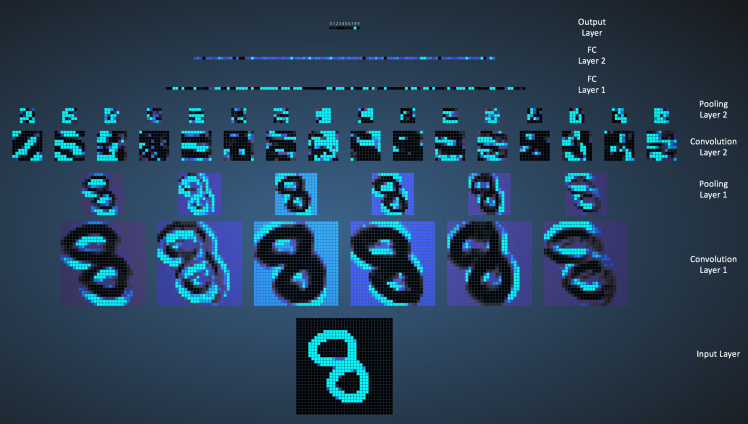

## Model Training

In [4]:
X_train = training[:,1:]/255  # we divid here by 255 to get normalised values
y_train = training[:,0]

X_test = testing[:,1:]/255  # we divid here by 255 to get normalised values
y_test = testing[:,0]

In [37]:
# we will also create validation dataset to avoid overfitting
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=12345)

In [39]:
X_train.shape,X_validate.shape,X_test.shape

((48000, 784), (12000, 784), (10000, 784))

In [6]:
# Now we need to reshape the datasets in order to apply it to the deep model
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0],*(28,28,1))


In [41]:
X_train.shape,X_validate.shape,X_test.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (10000, 28, 28, 1))

In [44]:
import keras

Using TensorFlow backend.


In [45]:
from keras.models import Sequential #we use sequetail model to follow some sequence in modelling like we are gona build in order
# of Convolutional layer, MaxPooling, Dropout, Flattening, Dense. This form the fully connected network.
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

## (32,3,3) kernel w/o dropout:

In [46]:
cnn_model = Sequential()

In [48]:
#we are using 32 feature detectors(kernels) each having size 3x3, can also use 64 or 128 or 256 or 512,etc feature detectors.
# input_shape shows the image of 28x28 & 1 shows the label
# we are using RELU activation funcion
cnn_model.add(Conv2D(32,3,3, input_shape = (28,28,1), activation='relu'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [49]:
# here we are using max-pool technique to convert the feature mapping into 2x2
cnn_model.add(MaxPool2D(pool_size=(2,2)))

In [50]:
cnn_model.add(Flatten())

In [52]:
# here we are using 32 hidden layers between the output coz the final output has to be the 10 class that we have to specify
cnn_model.add(Dense(output_dim=32, activation='relu'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  


In [53]:
# here we have 10 class & instead of relu we are using sigmoid coz we need to specify the one out-of the 10 classes
cnn_model.add(Dense(output_dim=10, activation='sigmoid'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  


In [54]:
# we have more than 2 categories in label that's why we are using 'sparse_categorical_crossentropy' if we have 0,1 label then
# we can use binary loss function.
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [55]:
# epochs use to specify how many times we are presenting training dataset & updating the weights
epochs = 50

In [56]:
# verbose stands for no. of infomation needed while training data
cnn_model.fit(X_train,
              y_train,
             batch_size=512,
             epochs=epochs,
             verbose=1,
             validation_data=(X_validate,y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 33s 689us/step - loss: 0.9379 - accuracy: 0.6941 - val_loss: 0.5404 - val_accuracy: 0.8091
Epoch 2/50
48000/48000 [==============================] - 34s 715us/step - loss: 0.4749 - accuracy: 0.8353 - val_loss: 0.4498 - val_accuracy: 0.8435
Epoch 3/50
48000/48000 [==============================] - 31s 644us/step - loss: 0.4152 - accuracy: 0.8564 - val_loss: 0.3998 - val_accuracy: 0.8638
Epoch 4/50
48000/48000 [==============================] - 31s 636us/step - loss: 0.3835 - accuracy: 0.8675 - val_loss: 0.3805 - val_accuracy: 0.8675
Epoch 5/50
48000/48000 [==============================] - 30s 627us/step - loss: 0.3604 - accuracy: 0.8755 - val_loss: 0.3495 - val_accuracy: 0.8810
Epoch 6/50
48000/48000 [==============================] - 31s 655us/step - loss: 0.3436 - accuracy: 0.8797 - val_loss: 0.3550 - val_accuracy: 0.8754
Epoch 7/50
48000/48000 [==============================] 

**`Alright after 50 epochs & 1500 secs we are reached accuracy from 69% to 95% assuming that we have only used 32 kernels. Let's Look on the evaluation part`**

## Model Evaluation & Predictions

In [65]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Loss : {:.3f}'.format(evaluation[0]),' & Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 3s 294us/step
Test Loss : 0.266  & Test Accuracy : 0.910


**`Here we observe that the training accuracy was above 95% but for testing set it's 91%(not BAD) which is sensible as the testing data was not seen by the model before ever.`**

In [69]:
Predicted_classes = cnn_model.predict_classes(X_test)
Predicted_classes

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

**Let's view 30 Predictions & prediction classes to be compared with the actual classes**

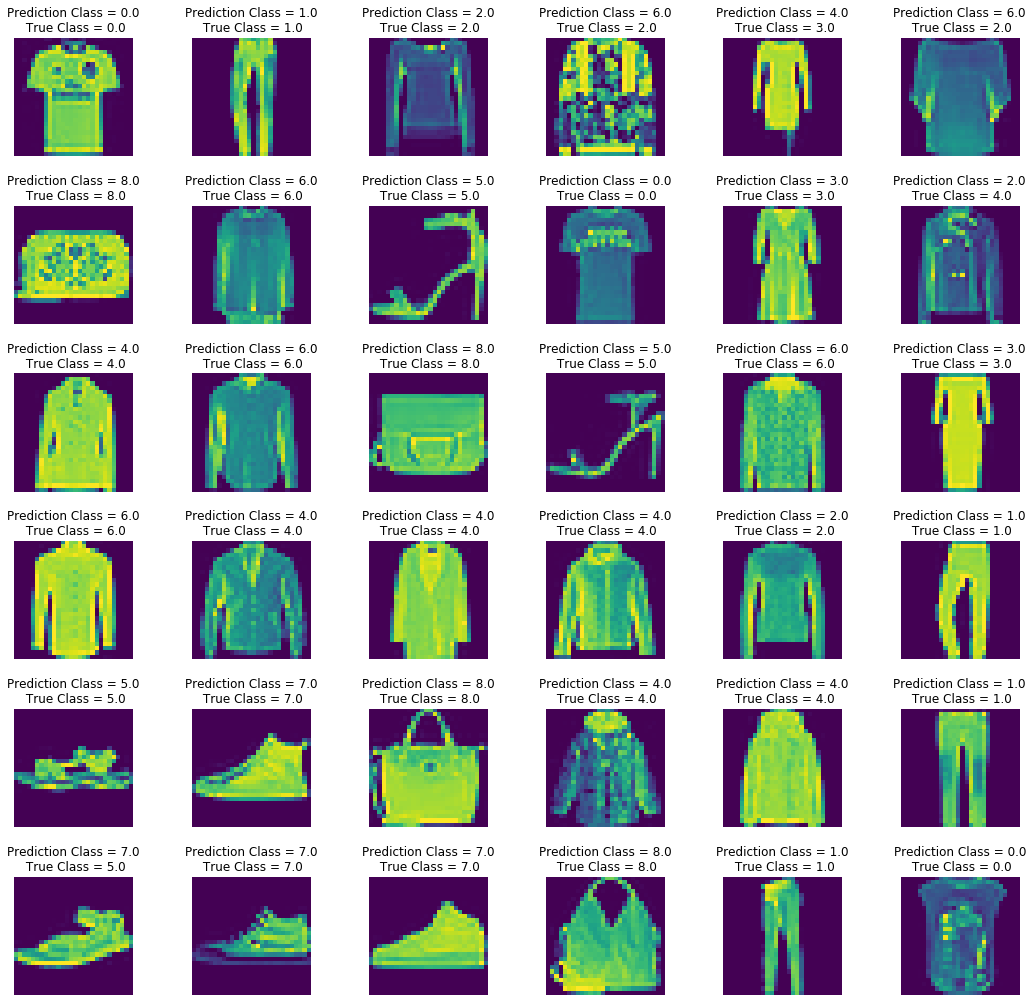

In [77]:
L = 6
W = 6
fig, axes = plt.subplots(L,W, figsize=(18,18))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title('Prediction Class = {:0.1f}\n True Class = {:.1f}'.format(Predicted_classes[i],y_test[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=.5)

**Label values ==> 0:'T-shirt/Top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle Boot'**

**`Here we observe that only 5 out-of 30 predictions are misclassified`**

### Confusion Matrix & Classification Report

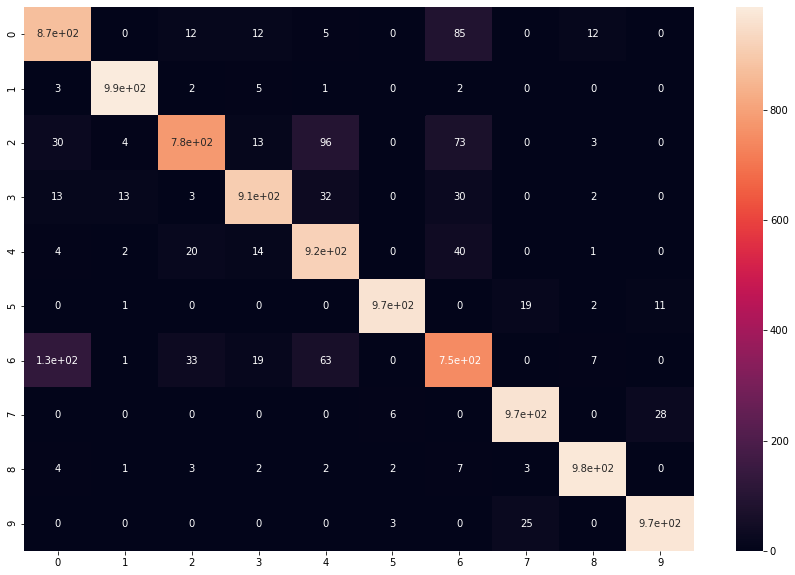

In [111]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,Predicted_classes)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True,cmap='rocket')
plt.show()
# Sum the diagonal to get the total correctly predicted values

Observe that the diagonal once are correctly classified & we see that their are many mis-classified points like 1.3*e12

Let's Look CM in better way showing the ratio wise distribution

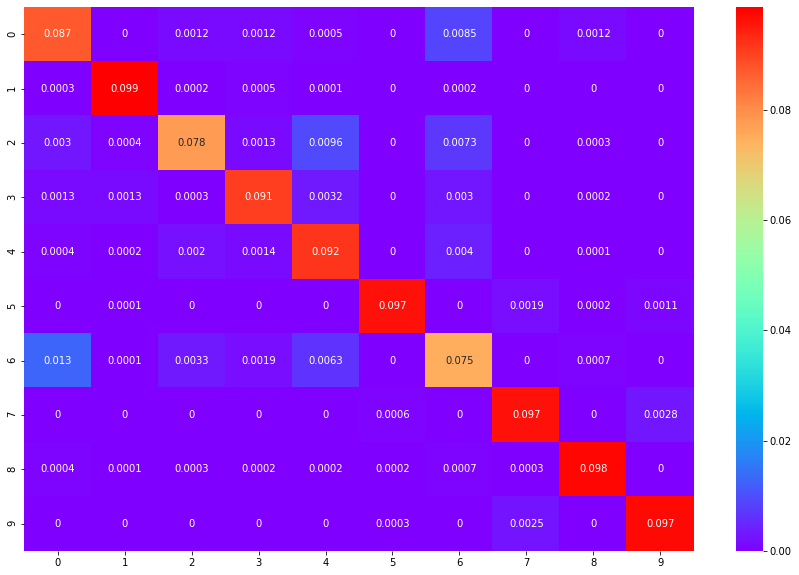

In [99]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,Predicted_classes)
plt.figure(figsize=(15,10))
sns.heatmap(cm/cm.sum(),annot=True,cmap='rainbow')
plt.show()
# Sum the diagonal to get the total correctly predicted values

In [106]:
Total_Misclassification = 1-cm.diagonal().sum()/cm.sum()
print('Total Misclassification: ',Total_Misclassification)

Total Misclassification:  0.09030000000000005


***There we observe that around 9% of images are misclassified***

In [122]:
cr = classification_report(y_test,Predicted_classes)
print('Classification Report : ','\n',cr)

Classification Report :  
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       0.98      0.99      0.98      1000
           2       0.91      0.78      0.84      1000
           3       0.93      0.91      0.92      1000
           4       0.82      0.92      0.87      1000
           5       0.99      0.97      0.98      1000
           6       0.76      0.75      0.75      1000
           7       0.95      0.97      0.96      1000
           8       0.97      0.98      0.97      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



**Label values ==> 0:'T-shirt/Top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle Boot'**

1. Here we observe that ***Sandal class, Trouser class, Bag class, Ankle Boot class*** are classified very well with the precision value of ***more than 95%***, Coz they are very easy to classify even for a kid say sandal class which can be indentified correctly even by the kid
2. Where as the ***Shirt class & Coat class*** having Low precision value, which makes sense as we can easily mess-up shirt with pullover let say & also not very clear with the images

## Model Improvement (can be done)

We can improve the model performance by
1. Increasing the ***Feature Filters/detectors*** from 32 to 64 or 128 or 256
## (64,3,3) kernel w/o dropout:

In [137]:
#we are using 64 feature detectors(kernels) each having size 3x3, can also use 128 or 256 or 512,etc feature detectors.
# input_shape shows the image of 28x28 & 1 shows the label
# we are using RELU activation funcion
cnn_model1 = Sequential()
cnn_model1.add(Conv2D(64,3,3, input_shape = (28,28,1), activation='relu'))
# here we are using max-pool technique to convert the feature mapping into 2x2
cnn_model1.add(MaxPool2D(pool_size=(2,2)))
cnn_model1.add(Flatten())
# here we are using 64 hidden layers between the output coz the final output has to be the 10 class that we have to specify
cnn_model1.add(Dense(output_dim=64, activation='relu'))
# here we have 10 class & instead of relu we are using sigmoid coz we need to specify the one out-of the 10 classes
cnn_model1.add(Dense(output_dim=10, activation='sigmoid'))
# we have more than 2 categories in label that's why we are using 'sparse_categorical_crossentropy' if we have 0,1 label then
# we can use binary loss function.
cnn_model1.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
# epochs use to specify how many times we are presenting training dataset & updating the weights
epochs = 50
# verbose stands for no. of infomation needed while training data
cnn_model1.fit(X_train,
              y_train,
             batch_size=512,
             epochs=epochs,
             verbose=1,
             validation_data=(X_validate,y_validate))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64)`
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  if sys.path[0] == '':


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 104s 2ms/step - loss: 0.7174 - accuracy: 0.7535 - val_loss: 0.4606 - val_accuracy: 0.8355
Epoch 2/50
48000/48000 [==============================] - 100s 2ms/step - loss: 0.4223 - accuracy: 0.8499 - val_loss: 0.3888 - val_accuracy: 0.8653
Epoch 3/50
48000/48000 [==============================] - 99s 2ms/step - loss: 0.3671 - accuracy: 0.8718 - val_loss: 0.3462 - val_accuracy: 0.8816
Epoch 4/50
48000/48000 [==============================] - 111s 2ms/step - loss: 0.3303 - accuracy: 0.8848 - val_loss: 0.3274 - val_accuracy: 0.8851
Epoch 5/50
48000/48000 [==============================] - 106s 2ms/step - loss: 0.3061 - accuracy: 0.8926 - val_loss: 0.3094 - val_accuracy: 0.8916
Epoch 6/50
48000/48000 [==============================] - 112s 2ms/step - loss: 0.2887 - accuracy: 0.8978 - val_loss: 0.2959 - val_accuracy: 0.8962
Epoch 7/50
48000/48000 [==============================] - 112s 

**`We reached accuracy from 75% to 98.82% assuming that we have only used 64 kernels. Let's Look on the evaluation part`**

10000/10000 [==============================] - 11s 1ms/step
Test Loss : 0.305  & Test Accuracy : 0.918


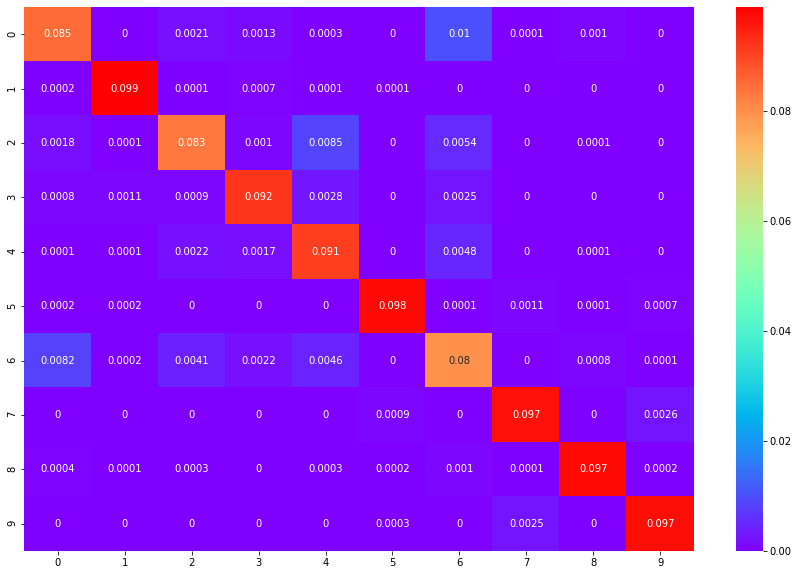

Total Misclassification:  0.0816
Classification Report :  
               precision    recall  f1-score   support

           0       0.88      0.85      0.86      1000
           1       0.98      0.99      0.99      1000
           2       0.90      0.83      0.86      1000
           3       0.93      0.92      0.92      1000
           4       0.85      0.91      0.88      1000
           5       0.98      0.98      0.98      1000
           6       0.77      0.80      0.78      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [139]:
evaluation1 = cnn_model1.evaluate(X_test, y_test)
print('Test Loss : {:.3f}'.format(evaluation1[0]),' & Test Accuracy : {:.3f}'.format(evaluation1[1]))
Predicted_classes1 = cnn_model1.predict_classes(X_test)
from sklearn.metrics import confusion_matrix,classification_report
cm1 = confusion_matrix(y_test,Predicted_classes1)
plt.figure(figsize=(15,10))
sns.heatmap(cm1/cm1.sum(),annot=True,cmap='rainbow')
plt.show()
# Sum the diagonal to get the total correctly predicted values
Total_Misclassification1 = 1-cm1.diagonal().sum()/cm1.sum()
print('Total Misclassification: ',Total_Misclassification1)
cr1 = classification_report(y_test,Predicted_classes1)
print('Classification Report : ','\n',cr1)

***The Overall Model Performance is improved***

2. Using ***Dropout method*** by droping out units in neaural network, Droping out is a regularization techniue which reduces overfitting in NN, also it by droping out some units the NN model is more generalised & can be applied to any data with better performance, In simple words it relax the NN by droping some of units & makes architectures of NN more relaxed. Dropout can be done by adding the dropout command in the cnn_model & also specifying the rate of dropout let say 15% or 20%.
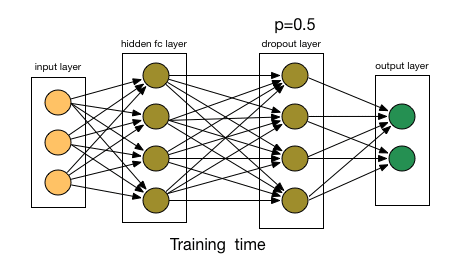

## (64,3,3) kernel with dropout:

In [8]:
#we are using 64 feature detectors(kernels) each having size 3x3, can also use 128 or 256 or 512,etc feature detectors.
# input_shape shows the image of 28x28 & 1 shows the label
# we are using RELU activation funcion
cnn_model2 = Sequential()
cnn_model2.add(Conv2D(64,3,3, input_shape = (28,28,1), activation='relu'))
# here we are using max-pool technique to convert the feature mapping into 2x2
cnn_model2.add(MaxPool2D(pool_size=(2,2)))
cnn_model2.add(Dropout(rate=.17))
cnn_model2.add(Flatten())
# here we are using 64 hidden layers between the output coz the final output has to be the 10 class that we have to specify
cnn_model2.add(Dense(output_dim=64, activation='relu'))
# here we have 10 class & instead of relu we are using sigmoid coz we need to specify the one out-of the 10 classes
cnn_model2.add(Dense(output_dim=10, activation='sigmoid'))
# we have more than 2 categories in label that's why we are using 'sparse_categorical_crossentropy' if we have 0,1 label then
# we can use binary loss function.
cnn_model2.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
# epochs use to specify how many times we are presenting training dataset & updating the weights
epochs = 50
# verbose stands for no. of infomation needed while training data
cnn_model2.fit(X_train,
              y_train,
             batch_size=512,
             epochs=epochs,
             verbose=1,
             validation_data=(X_validate,y_validate))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64)`
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  del sys.path[0]


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 61s 1ms/step - loss: 0.7229 - accuracy: 0.7479 - val_loss: 0.4725 - val_accuracy: 0.8312
Epoch 2/50
48000/48000 [==============================] - 63s 1ms/step - loss: 0.4159 - accuracy: 0.8548 - val_loss: 0.4118 - val_accuracy: 0.8533
Epoch 3/50
48000/48000 [==============================] - 62s 1ms/step - loss: 0.3683 - accuracy: 0.8726 - val_loss: 0.3670 - val_accuracy: 0.8713
Epoch 4/50
48000/48000 [==============================] - 62s 1ms/step - loss: 0.3328 - accuracy: 0.8842 - val_loss: 0.3311 - val_accuracy: 0.8838
Epoch 5/50
48000/48000 [==============================] - 62s 1ms/step - loss: 0.3178 - accuracy: 0.8899 - val_loss: 0.3099 - val_accuracy: 0.8930
Epoch 6/50
48000/48000 [==============================] - 68s 1ms/step - loss: 0.2992 - accuracy: 0.8946 - val_loss: 0.3221 - val_accuracy: 0.8844
Epoch 7/50
48000/48000 [==============================] - 71s 1ms/st

**`We reached accuracy from 74.79% to 96.79% assuming that we have only used 64 kernels & dropout rate of 17%. Let's Look on the evaluation part`**

10000/10000 [==============================] - 5s 458us/step
Test Loss : 0.283  & Test Accuracy : 0.916


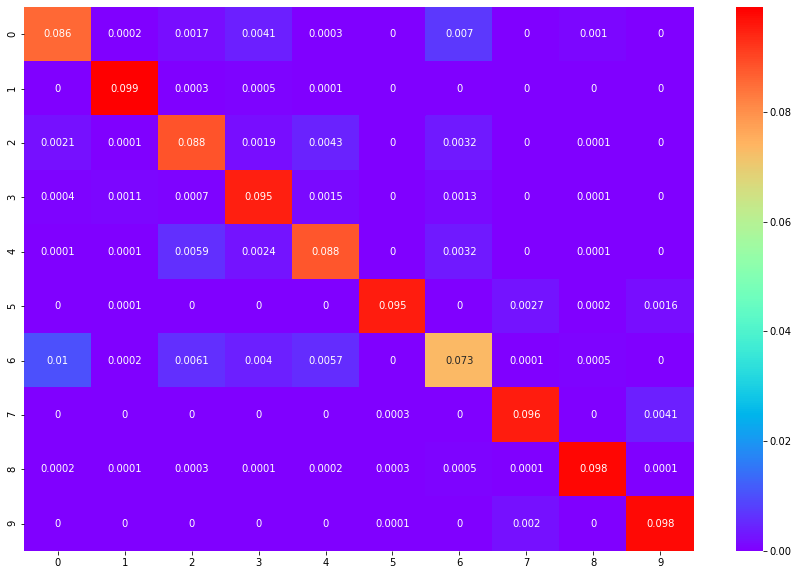

Total Misclassification:  0.08360000000000001
Classification Report :  
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      1000
           1       0.98      0.99      0.99      1000
           2       0.85      0.88      0.87      1000
           3       0.88      0.95      0.91      1000
           4       0.88      0.88      0.88      1000
           5       0.99      0.95      0.97      1000
           6       0.83      0.73      0.78      1000
           7       0.95      0.96      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.94      0.98      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [11]:
evaluation2 = cnn_model2.evaluate(X_test, y_test)
print('Test Loss : {:.3f}'.format(evaluation2[0]),' & Test Accuracy : {:.3f}'.format(evaluation2[1]))
Predicted_classes2 = cnn_model2.predict_classes(X_test)
from sklearn.metrics import confusion_matrix,classification_report
cm2 = confusion_matrix(y_test,Predicted_classes2)
plt.figure(figsize=(15,10))
sns.heatmap(cm2/cm2.sum(),annot=True,cmap='rainbow')
plt.show()
# Sum the diagonal to get the total correctly predicted values
Total_Misclassification2 = 1-cm2.diagonal().sum()/cm2.sum()
print('Total Misclassification: ',Total_Misclassification2)
cr2 = classification_report(y_test,Predicted_classes2)
print('Classification Report : ','\n',cr2)

***One can observe that for each class the precision is optimised even better***

## CONCLUSION 
1. (32,3,3) kernel w/o dropout:   
***Accuracy : .9519, Test Accuracy : .9100 , Model approx. Run Time: 1500 secs***
2. (64,3,3) kernel w/o dropout:    
***Accuracy : .9882, Test Accuracy : .9180 , Model approx. Run Time: 5000 secs***
3. (64,3,3) kernel with dropout:    
***Accuracy : .9679, Test Accuracy : .9160 , Model approx. Run Time: 3500 secs***

***`One should Note that the 2nd model has better test accuracy, also one can play with the dropout rate which might give better results`***

***`Also, one might interested in reducing time, that can be done by increasing the dropout rate & keeping the kernel to 32`***
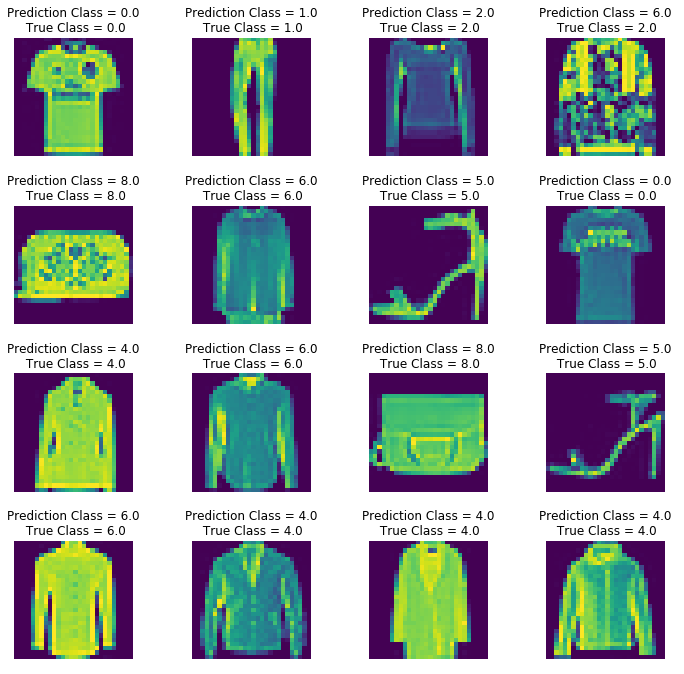

Advanced Techniques can be used using following dataset    

**Check out:** https://vue.ai/   
**Deep Fashion Dataset:** http://mmlab.ie.cuhk.edu.hk/projects/DeepFashion.html
# NOTE : Checkout ipython file to contribute to the project
**link:**

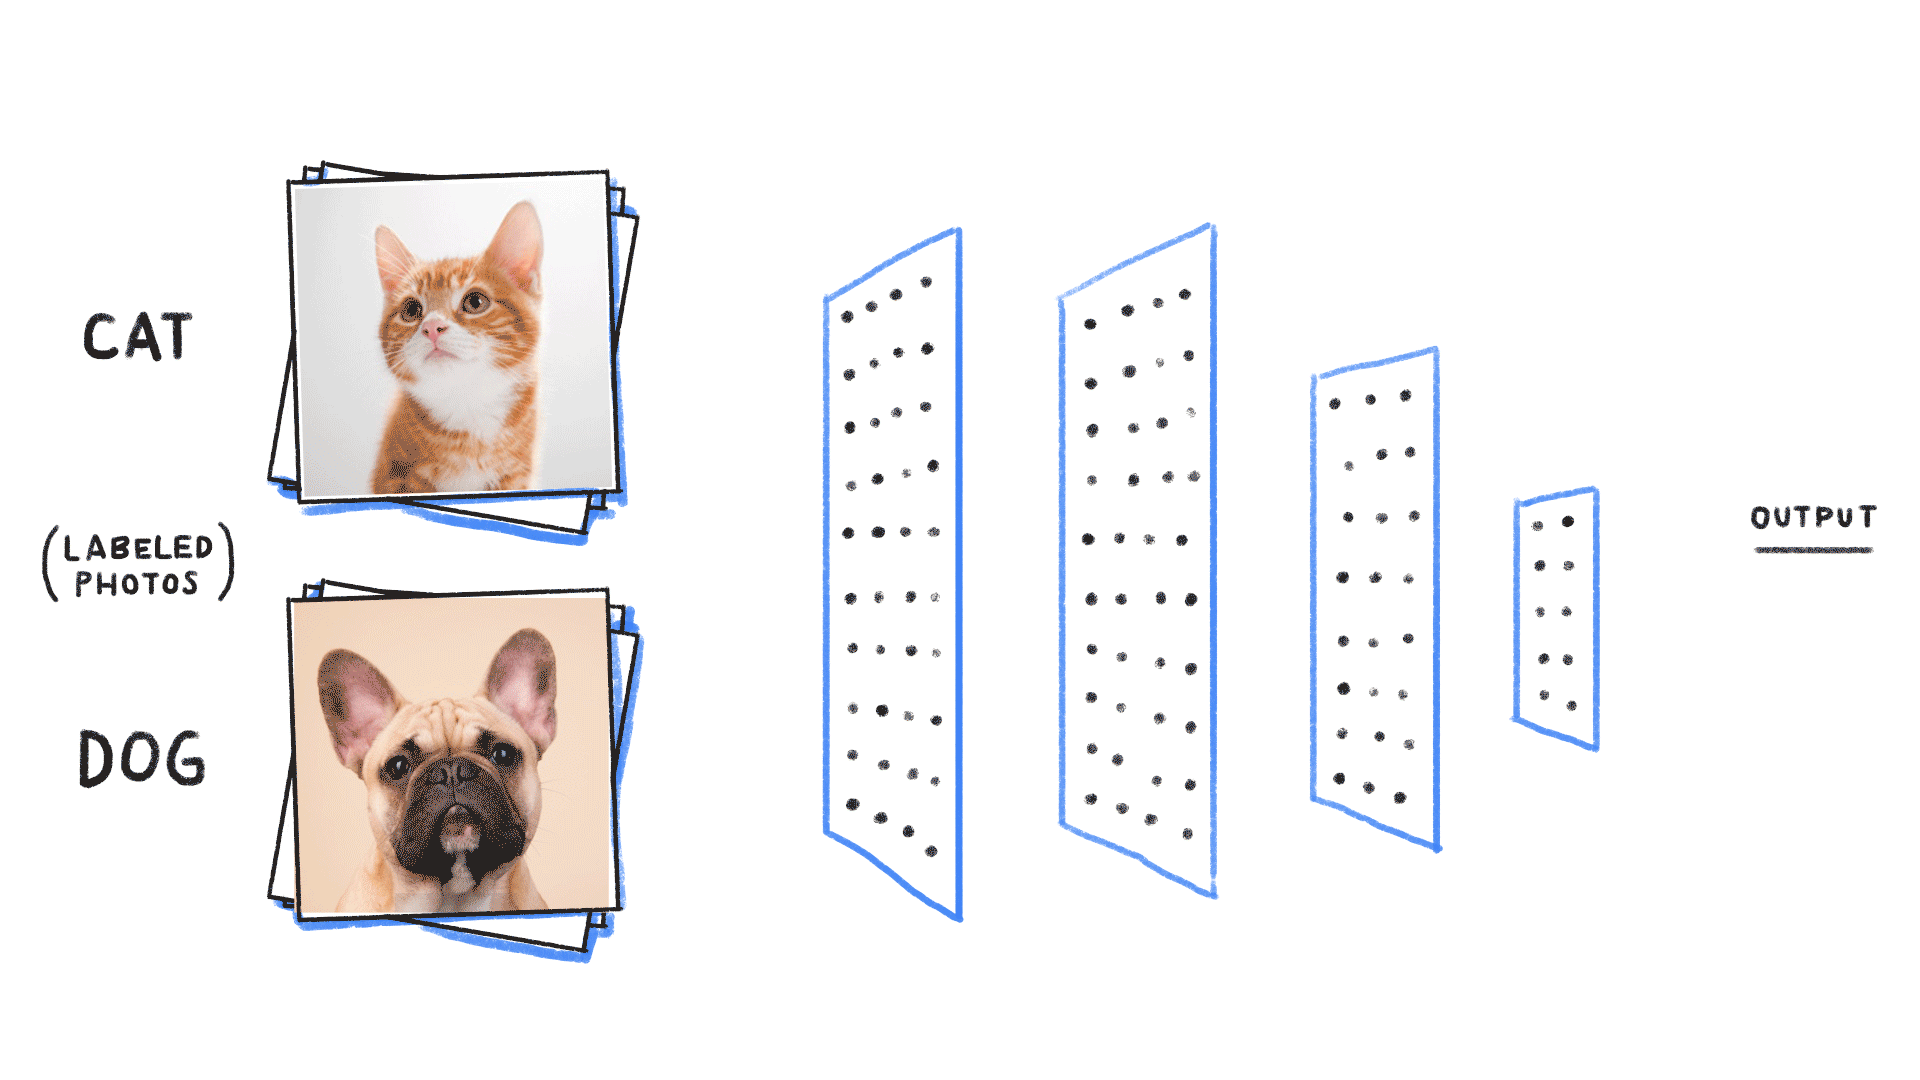